# 0. Setup

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

sys.path.append("..")

import arcadia_pycolor as apc

apc.mpl.setup()
apc.plotly.setup()

# 1. Generate raw data

In [2]:
lines = np.random.rand(10, 20)

# 2. Multiple line plot with `matplotlib`

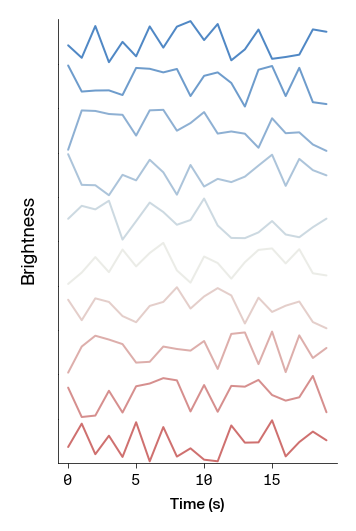

In [3]:
fig, axes = plt.subplots(
    nrows=len(lines),
    figsize=(5, 8),
)

colors = [apc.aegean, apc.gray, apc.dragon]

cmap = apc.Gradient(
    name="",
    colors=colors,
).to_mpl_cmap()

for i, line in enumerate(lines):
    ax = axes[i]  # type: ignore
    color = cmap(i / len(lines))
    ax.plot(line, color=color)
    apc.mpl.style_plot(axes=ax, monospaced_axes="both")
    ax.set_yticks([])

    if i != len(lines) - 1:
        ax.spines["bottom"].set_visible(False)
        ax.set_xticks([])
    else:
        ax.set_xlabel("Time (s)")

fig.supylabel("Brightness")

fig.subplots_adjust(hspace=0)

# 3. Multiple line plot with `plotly`

In [4]:
gradient = apc.Gradient(
    name="aegean_to_dragon",
    colors=colors,
).to_plotly_colorscale()

fig = go.Figure()

for i, line in enumerate(lines):
    fig.add_trace(
        go.Scatter(
            x=list(range(len(line))),
            y=line + (i * 1.25),
            mode="lines",
            name=f"line_{i}",
            line=dict(color=gradient[i * 25][1]),
        )
    )

fig.update_layout(
    xaxis=dict(title="Time (s)"),
    yaxis=dict(title="Brightness", ticks="", showticklabels=False),
    showlegend=False,
)

apc.plotly.set_xticklabel_monospaced(fig)
apc.plotly.set_figure_width(fig, "float_square")

fig.show()